In [1]:
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import matplotlib.pyplot as plt
import random


fig = plt.figure()
ax = Axes3D(fig)

## Sample & shuffle x,y,z values in random:

p_x_vals = list(range(0, 50))
p_y_vals = list(range(0, 50))
p_z_vals = list(range(0, 50))

random.shuffle(p_x_vals)
random.shuffle(p_y_vals)
random.shuffle(p_z_vals)

## Plot points in first quadrant:

ax.scatter(p_x_vals, p_y_vals, p_z_vals)
plt.show()

<Figure size 640x480 with 1 Axes>

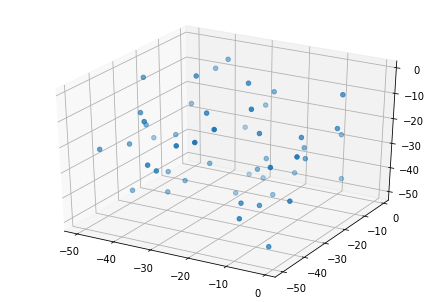

In [2]:
fig = plt.figure()
ax = Axes3D(fig)

# Pick values & shuffle:

neg_x_vals = list(range(-50, 0))
neg_y_vals = list(range(-50, 0))
neg_z_vals = list(range(-50, 0))

random.shuffle(neg_x_vals)
random.shuffle(neg_y_vals)
random.shuffle(neg_z_vals)

## Plot points in eight quadrant

ax.scatter(neg_x_vals, neg_y_vals, neg_z_vals)
plt.show()

In [3]:
## Merge x,y,z values in single points:

pos_data = np.stack((p_x_vals,p_y_vals,p_z_vals), axis=-1)
neg_data = np.stack((neg_x_vals,neg_y_vals,neg_z_vals), axis=-1) 

In [4]:
## First quadrant class defined as "1"

pos_list = []
for x in pos_data.tolist():
    pos_list.append(x+[1])

In [5]:
## Eight quadrant class defined as "1"

neg_list = []
for x in neg_data.tolist():
    neg_list.append(x+[-1])

In [6]:
len(neg_list)

50

In [7]:
len(pos_list)

50

In [8]:
neg_list = np.array(neg_list)
pos_list = np.array(pos_list)

In [9]:
## Split train and test data points in two classes:

pos_training, pos_test = pos_list[:40,:], pos_list[40:,:]
neg_training, neg_test = neg_list[:40,:], neg_list[40:,:]

In [10]:
## Concat train & test data points:

data = np.concatenate((pos_training, neg_training), axis=0)
test_data = np.concatenate((pos_test, neg_test), axis=0)

In [11]:
np.random.shuffle(test_data)

In [12]:
np.random.shuffle(data)

In [13]:
## Perceptron model:

from numpy import array, dot, random

## Hard-limiting non-linerity:

unit_step = lambda x: -1 if x < 0 else 1

## Weights are initialized:

w = random.rand(4)
errors = []
eta = 0.2                ## LRate
n = 100                  ## Epoch
bias = 1                 ## Bias term

w[0]= bias
iter_ind = []
## Iterate until convergence:

for i in range(n):
    for t in data:
        x = t[:-1]
        x.shape
        expected = t[-1:]
        result = dot(w[1:], x)+ w[0]
        error = expected - unit_step(result)
        errors.append(error)
        iter_ind.append(i)
        w[1:]+= eta * error * x
        w[0] += eta * error

for x in test_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:-1],x[-1:], unit_step(result)))

[-16 -32  -5]: [-1] -> -1
[33 16 42]: [1] -> 1
[-17  -9 -42]: [-1] -> -1
[ -7  -4 -44]: [-1] -> -1
[ 4  4 46]: [1] -> 1
[ -6 -41 -20]: [-1] -> -1
[ -4 -11  -6]: [-1] -> -1
[23  3  9]: [1] -> 1
[ 5 33 27]: [1] -> 1
[48 24  8]: [1] -> 1
[21 13 11]: [1] -> 1
[-21 -20 -36]: [-1] -> -1
[45 37 40]: [1] -> 1
[-36 -28 -41]: [-1] -> -1
[-42 -22 -27]: [-1] -> -1
[11 30 15]: [1] -> 1
[37  9 28]: [1] -> 1
[41 11 22]: [1] -> 1
[-33 -49 -23]: [-1] -> -1
[-49 -44 -24]: [-1] -> -1


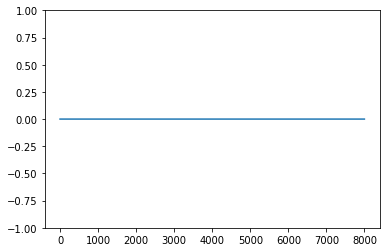

In [14]:
plt.figure(2)
plt.ylim([-1,1]) 
plt.plot(errors)


In [15]:
errors

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),

In [36]:
w

array([1.        , 0.03919347, 0.87104244, 0.45636369])

In [37]:
normal = w

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = 1

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-w[0] * xx - w[1] * yy - d) * 1. /w[2]


In [38]:
all_sample = np.vstack((data,test_data))

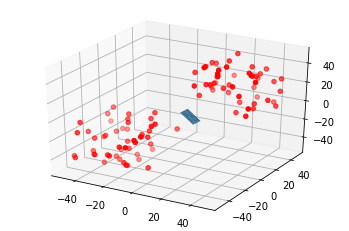

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Plot decision plane:

ax.plot_surface(xx, yy, z, alpha=1)

# Plot all samples:

ax.scatter(all_sample[:,0] , all_sample[:,1] , all_sample[:,2],  color='red')